# **Countrywise Life Expectancy + Risks Exploratory Data Analysis**

###**Descriptions of Fields**

**Part 1 : Obtained from 'Life Expectancy' dataset (WHO)**
(https://www.kaggle.com/kumarajarshi/life-expectancy-who)

- country (Nominal) : Name of the country corresponding indicators are for
- year (Ordinal) : Year the indicators were recorded (range: 2000 to 2015 -- 16 years)
- status (Nominal) : A country is categorised as 'Developed' or 'Developing' as per WHO metrics
- life_expectancy (Ratio) : Life expectancy (in years) for people in a particular country (for a given year)
- adult_mortality (Ratio) : Adult mortality rate (ages 15-60) per 1000 people
- infant_deaths (Ratio) : number of infant deaths per 1000 infants
- alcohol (Ratio) : Alcohol consumption rate of country, recorded per capita consumption (in litres of pure alcohol)
- percentage_expenditure (Ratio) : Expenditure on health as % of country's GDP per capita
- hepatitis_b (Ratio) : Percentage of 1 year olds with Hepatitis B immunization
- measles (Ratio) : # of (reported) cases of Measles per 1000 population
- bmi (Interval/Ordinal) : Average BMI (Body Mass Index) of country's population
- under-five_deaths (Ratio) : # of deaths of children under the age of 5, per 1000 population
- polio (Ratio) : Percentage of 1 year olds with Polio immunization
- total_expenditure (Ratio) : Percentage of total government expenditure towards Health
- diphtheria (Ratio) - Percentage of 1 year olds with Diphtheria tetanus toxoid and pertussis (DTP3) immunization  
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for children under 5
- gdp (Ratio) - Gross Domestic Product per capita (USD)
- population (Ratio) - Population of a country
- thinness_10-19_years (Ratio) - rate of thinness among people aged 10-19 
- thinness_5-9_years (Ratio) - rate of thinness among children aged 5-9
- income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling (Ratio) - Average number of years of schooling of country's population

<br/>

**Part 2 : Obtained from 'Worldwide deaths by country/risk factors' dataset (WHO)**
(https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors)

- Unsafe water source : Total annual number of deaths due to unsafe water source
- Unsafe sanitation : Total annual number of deaths due to unsafe sanitation
```remaining fields follow same trend: annual number of deaths due to <insert risk factor> -- description to-be-continued...```


*(Note: thinness_1-19_years is incorrectly named; must be renamed to thinness_10-19_years)*

### Life expectancy : Statistical measure of number of years an average human is expected to live; mathematically elegant!

### Is Life expectancy measure of choice in aetiological research / identifying risk factors of death? 
From correlation matrix: No
<br/>
Reason: Life Expectancy is a good measure of public health indicators, but estimations of LE are not straightforward since it is standardised against different age distributions; the translation of changes in age-specific mortality into change in remaining Life expectancy will depend on the level and the distribution of mortality in the population

## Data Download, Merging

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import opendatasets as od
#download_url_lifeExpectancy = 'https://www.kaggle.com/kumarajarshi/life-expectancy-who'
#download_url_risks = 'https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors'

#od.download(download_url_lifeExpectancy)
#od.download(download_url_risks)

In [3]:
lifeExpectancy_fileName = './Life Expectancy Data.csv'
risks_fileName = './number-of-deaths-by-risk-factor.csv'

## Data Preparation, Cleaning

1. Load both datasets using Pandas
2. Merge the datasets
3. Fix any missing or incorrect values
- How much numeric data do we have?

In [4]:
import pandas as pd
import numpy as np

In [5]:
lifeExpectancy_df = pd.read_csv(lifeExpectancy_fileName)
risks_df = pd.read_csv(risks_fileName)
lifeExpectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Merging the datasets

In [6]:
df = pd.merge(lifeExpectancy_df,risks_df, left_on=["Country","Year"], right_on=["Entity","Year"]).drop('Entity',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2594 entries, 0 to 2593
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   2594 non-null   object 
 1   Year                                      2594 non-null   int64  
 2   Status                                    2594 non-null   object 
 3   Life expectancy                           2592 non-null   float64
 4   Adult Mortality                           2592 non-null   float64
 5   infant deaths                             2594 non-null   int64  
 6   Alcohol                                   2421 non-null   float64
 7   percentage expenditure                    2594 non-null   float64
 8   Hepatitis B                               2092 non-null   float64
 9   Measles                                   2594 non-null   int64  
 10   BMI                                

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,2594.000000,2592.000000,2592.000000,2594.000000,2421.000000,2594.000000,2092.000000,2594.000000,2562.000000,2594.000000,...,2.594000e+03,2.594000e+03,2594.000000,2594.000000,2594.000000,2.594000e+03,2.594000e+03,2.594000e+03,2594.000000,2594.000000
mean,2007.504241,69.317554,163.900077,30.936777,4.647109,822.845334,81.027247,2315.411334,38.606987,43.008867,...,4.376735e+04,3.275525e+04,497.923030,2641.205700,1296.485551,2.568389e+04,1.525823e+04,1.416482e+04,13442.422907,8794.024937
std,4.611412,9.570416,124.353841,124.083555,4.092943,2096.688974,24.960681,10886.460858,19.921293,168.702668,...,1.783114e+05,1.568866e+05,2620.296488,12180.022512,6506.138623,1.274432e+05,8.284735e+04,1.004244e+05,57306.509605,33453.498590
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,7.995287e+01,2.973595e+01,0.018049,0.026281,0.478305,2.849307e+01,8.270000e+00,1.041593e+01,24.370348,19.114424
25%,2004.000000,63.000000,72.000000,0.000000,0.850000,13.322781,77.000000,0.000000,19.500000,0.000000,...,2.434114e+03,1.268413e+03,1.871014,1.493423,39.752476,9.652181e+02,5.460550e+02,3.703645e+02,759.714507,531.435365
50%,2008.000000,72.200000,143.500000,3.000000,3.850000,89.464230,92.000000,14.500000,44.050000,3.000000,...,8.766975e+03,4.224841e+03,15.185429,35.731541,212.637473,4.441327e+03,1.718710e+03,1.312900e+03,2632.331939,1797.093223
75%,2012.000000,75.800000,227.000000,21.750000,7.700000,513.157105,97.000000,346.250000,56.300000,28.000000,...,2.405123e+04,1.516012e+04,287.296900,1195.279090,588.817956,1.217057e+04,6.243998e+03,4.340230e+03,7537.344429,5834.900167
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,81.600000,2500.000000,...,2.458188e+06,2.103488e+06,47540.143510,198694.176100,86650.517680,1.243675e+06,1.012632e+06,1.607522e+06,741877.548600,388007.745400


In [9]:
original_columns = list(df.columns)
updated_col_names = []
for colName in list(df.columns):
    updated_col_names.append(colName.strip().replace('  ',' ').replace(' ', '_').lower())
df.columns = updated_col_names
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,32163.22748,8683.697759,1065.783979,5033.485922,434.828046,26033.718410,6780.26,3316.445516,14242.305350,8687.274664
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,31880.46954,8488.531529,1104.609311,4940.224678,425.964780,26251.144600,6414.25,3272.323115,14065.398290,8583.175662
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,31572.44542,8309.869419,1134.042444,5210.263059,421.347745,26468.199310,6438.87,3214.655896,13860.627410,8507.319690
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,31361.54528,8156.920612,1161.643271,6431.888593,413.903423,26529.230520,6475.42,3152.690488,13698.734900,8454.321712
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,31297.39118,8046.937583,1202.670796,6435.464674,409.034725,27174.744310,6425.95,3097.710300,13614.033650,8452.451444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,11999.71198,9996.875992,523.400146,1350.758563,264.095644,9265.589396,2150.02,1182.667926,2846.835542,2566.348230
2590,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,11689.56757,9715.978369,475.538607,1040.737318,264.527127,9038.010170,2127.40,1166.157578,2748.760333,2495.286436
2591,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,11462.22648,9509.591083,441.448155,1017.332423,259.393994,8767.487116,2102.35,1156.185027,2679.146668,2446.181319
2592,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,10796.77019,8958.253911,386.030657,911.045391,252.145120,8270.534579,1976.90,1101.466718,2502.040962,2295.674524


BMI range: 12 to 50?

In [10]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
count,2594.000000,2592.000000,2592.000000,2594.000000,2421.000000,2594.000000,2092.000000,2594.000000,2562.000000,2594.000000,...,2.594000e+03,2.594000e+03,2594.000000,2594.000000,2594.000000,2.594000e+03,2.594000e+03,2.594000e+03,2594.000000,2594.000000
mean,2007.504241,69.317554,163.900077,30.936777,4.647109,822.845334,81.027247,2315.411334,38.606987,43.008867,...,4.376735e+04,3.275525e+04,497.923030,2641.205700,1296.485551,2.568389e+04,1.525823e+04,1.416482e+04,13442.422907,8794.024937
std,4.611412,9.570416,124.353841,124.083555,4.092943,2096.688974,24.960681,10886.460858,19.921293,168.702668,...,1.783114e+05,1.568866e+05,2620.296488,12180.022512,6506.138623,1.274432e+05,8.284735e+04,1.004244e+05,57306.509605,33453.498590
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,7.995287e+01,2.973595e+01,0.018049,0.026281,0.478305,2.849307e+01,8.270000e+00,1.041593e+01,24.370348,19.114424
25%,2004.000000,63.000000,72.000000,0.000000,0.850000,13.322781,77.000000,0.000000,19.500000,0.000000,...,2.434114e+03,1.268413e+03,1.871014,1.493423,39.752476,9.652181e+02,5.460550e+02,3.703645e+02,759.714507,531.435365
50%,2008.000000,72.200000,143.500000,3.000000,3.850000,89.464230,92.000000,14.500000,44.050000,3.000000,...,8.766975e+03,4.224841e+03,15.185429,35.731541,212.637473,4.441327e+03,1.718710e+03,1.312900e+03,2632.331939,1797.093223
75%,2012.000000,75.800000,227.000000,21.750000,7.700000,513.157105,97.000000,346.250000,56.300000,28.000000,...,2.405123e+04,1.516012e+04,287.296900,1195.279090,588.817956,1.217057e+04,6.243998e+03,4.340230e+03,7537.344429,5834.900167
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,81.600000,2500.000000,...,2.458188e+06,2.103488e+06,47540.143510,198694.176100,86650.517680,1.243675e+06,1.012632e+06,1.607522e+06,741877.548600,388007.745400


Checking for duplicated rows: None found

In [11]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape[0]

0

Checking for percentages of NULL values in each column

In [12]:
missing = (df.isna().sum()/len(df)*100).sort_values(ascending=False)

<AxesSubplot:>

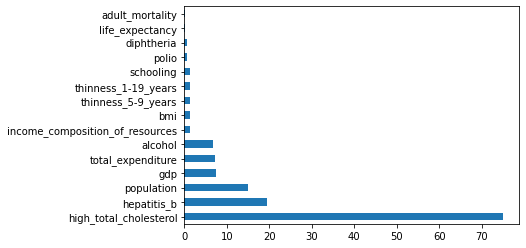

In [13]:
missing = missing[missing > 0]
missing.plot(kind='barh')

Percentage of missing values in each column

In [14]:
missing

high_total_cholesterol             75.019275
hepatitis_b                        19.352352
population                         15.034695
gdp                                 7.517348
total_expenditure                   7.324595
alcohol                             6.669237
income_composition_of_resources     1.272167
bmi                                 1.233616
thinness_5-9_years                  1.233616
thinness_1-19_years                 1.233616
schooling                           1.233616
polio                               0.655359
diphtheria                          0.655359
life_expectancy                     0.077101
adult_mortality                     0.077101
dtype: float64

Dealing with NULL values: interpolation / imputation?



Find out which countries have 'population' data missing for all years (to be added manually)

In [15]:
#df.drop(columns=['high_total_cholesterol'], axis=1, inplace=True)
import math
df.isnull().sum()
#df.drop(columns=['hepatitis_b'], axis=1, inplace=True)
i=0
countries =  df['country'].unique()
countries
dict1 = dict()
for index, row in df.iterrows():
    country = row['country']
    if math.isnan(row['population']):
        if country not in dict1.keys():
            dict1[country] = 1
        else:
            dict1[country] = dict1[country]+1 
        
        
dict1

{'Antigua and Barbuda': 16,
 'Bahamas': 16,
 'Bahrain': 16,
 'Barbados': 16,
 'Congo': 16,
 'Cuba': 16,
 'Czechia': 16,
 'Dominica': 1,
 'Egypt': 16,
 'Eritrea': 4,
 'Gambia': 16,
 'Grenada': 16,
 'Kuwait': 16,
 'Kyrgyzstan': 16,
 'Libya': 16,
 'Marshall Islands': 1,
 'New Zealand': 16,
 'Oman': 16,
 'Qatar': 16,
 'Saint Lucia': 16,
 'Saint Vincent and the Grenadines': 16,
 'Saudi Arabia': 16,
 'Singapore': 16,
 'Slovakia': 16,
 'Somalia': 16,
 'United Arab Emirates': 16,
 'Yemen': 16}

In [16]:
values = df['country'].value_counts()
print(values)
#Drop Marshall Islands and Dominica @Kapasi
#Manually impute populations for each country that doesn't have populations; Take 2000, 2005, 2010, 2015 populaion data from Google, 
#impute it python me hi, and interpolate other years's ke values from those. All the best. ***** ****.

Afghanistan         16
Romania             16
Namibia             16
Nepal               16
Netherlands         16
                    ..
Germany             16
Ghana               16
Greece              16
Marshall Islands     1
Dominica             1
Name: country, Length: 164, dtype: int64


How many columns (datatypes) are numeric?

In [17]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns_df = df.select_dtypes(include = numeric)
len(numeric_columns_df.columns)

49

Outlier analysis

In [18]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for field in df.columns[3:]:
    q25, q75 = np.percentile(df[field], [25 ,75])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("# of outliers, % of {} : {} and {}".format(field, len((np.where((df[field] > max_val) | (df[field] < min_val))[0])),len((np.where((df[field] > max_val) | (df[field] < min_val))[0]))*100/1987))

# of outliers, % of life_expectancy : 0 and 0.0
# of outliers, % of adult_mortality : 0 and 0.0
# of outliers, % of infant_deaths : 278 and 13.990941117262205
# of outliers, % of alcohol : 0 and 0.0
# of outliers, % of percentage_expenditure : 346 and 17.413185707096126
# of outliers, % of hepatitis_b : 0 and 0.0
# of outliers, % of measles : 483 and 24.30800201308505
# of outliers, % of bmi : 0 and 0.0
# of outliers, % of under-five_deaths : 346 and 17.413185707096126
# of outliers, % of polio : 0 and 0.0
# of outliers, % of total_expenditure : 0 and 0.0
# of outliers, % of diphtheria : 0 and 0.0
# of outliers, % of hiv/aids : 488 and 24.55963764469049
# of outliers, % of gdp : 0 and 0.0
# of outliers, % of population : 0 and 0.0
# of outliers, % of thinness_1-19_years : 0 and 0.0
# of outliers, % of thinness_5-9_years : 0 and 0.0
# of outliers, % of income_composition_of_resources : 0 and 0.0
# of outliers, % of schooling : 0 and 0.0
# of outliers, % of unsafe_water_source : 377 and 

In [19]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'unsafe_water_source', 'unsafe_sanitation',
       'no_access_to_handwashing_facility',
       'household_air_pollution_from_solid_fuels',
       'non-exclusive_breastfeeding', 'discontinued_breastfeeding',
       'child_wasting', 'child_stunting', 'low_birth_weight_for_gestation',
       'secondhand_smoke', 'alcohol_use', 'drug_use', 'diet_low_in_fruits',
       'diet_low_in_vegetables', 'unsafe_sex', 'low_physical_activity',
       'high_fasting_plasma_glucose', 'high_total_cholesterol',
       'high_body-mass_index', 'high_systolic_blood_pressure', 'smoking',
       'iron_deficiency', 'vitamin_a_deficie

In [20]:
df['bmi'].isna().sum()
#df['adult_mortality'] = df['adult_mortality'].replace(0, np.nan)
#df['adult_mortality'].isna().sum()

32

In [21]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
count,2594.000000,2592.000000,2592.000000,2594.000000,2421.000000,2594.000000,2092.000000,2594.000000,2562.000000,2594.000000,...,2.594000e+03,2.594000e+03,2594.000000,2594.000000,2594.000000,2.594000e+03,2.594000e+03,2.594000e+03,2594.000000,2594.000000
mean,2007.504241,69.317554,163.900077,30.936777,4.647109,822.845334,81.027247,2315.411334,38.606987,43.008867,...,4.376735e+04,3.275525e+04,497.923030,2641.205700,1296.485551,2.568389e+04,1.525823e+04,1.416482e+04,13442.422907,8794.024937
std,4.611412,9.570416,124.353841,124.083555,4.092943,2096.688974,24.960681,10886.460858,19.921293,168.702668,...,1.783114e+05,1.568866e+05,2620.296488,12180.022512,6506.138623,1.274432e+05,8.284735e+04,1.004244e+05,57306.509605,33453.498590
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,7.995287e+01,2.973595e+01,0.018049,0.026281,0.478305,2.849307e+01,8.270000e+00,1.041593e+01,24.370348,19.114424
25%,2004.000000,63.000000,72.000000,0.000000,0.850000,13.322781,77.000000,0.000000,19.500000,0.000000,...,2.434114e+03,1.268413e+03,1.871014,1.493423,39.752476,9.652181e+02,5.460550e+02,3.703645e+02,759.714507,531.435365
50%,2008.000000,72.200000,143.500000,3.000000,3.850000,89.464230,92.000000,14.500000,44.050000,3.000000,...,8.766975e+03,4.224841e+03,15.185429,35.731541,212.637473,4.441327e+03,1.718710e+03,1.312900e+03,2632.331939,1797.093223
75%,2012.000000,75.800000,227.000000,21.750000,7.700000,513.157105,97.000000,346.250000,56.300000,28.000000,...,2.405123e+04,1.516012e+04,287.296900,1195.279090,588.817956,1.217057e+04,6.243998e+03,4.340230e+03,7537.344429,5834.900167
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,81.600000,2500.000000,...,2.458188e+06,2.103488e+06,47540.143510,198694.176100,86650.517680,1.243675e+06,1.012632e+06,1.607522e+06,741877.548600,388007.745400


In [22]:
df['bmi'].min(), df['bmi'].max()

(1.4, 81.6)

Winsorization: Squashes data according to specified percentile
Eg: All data above 95th percentile is made to be equal to the 95th percentile; All data below 5th percentile is made to be equal to the 5th percentile

Note: scipy.stats.sem acquired keyword 'nan_policy' in release 0.17.0, so code might throw error if you're using 0.16.0

In [23]:
from scipy import stats
import scipy.stats
scipy.stats.mstats.winsorize(df['bmi'], limits=(0.1, 0.4), inplace=True, nan_policy='omit')
df['bmi'].describe()

count    2594.000000
mean       36.630840
std        15.571646
min        12.400000
25%        19.525000
50%        44.450000
75%        51.300000
max        51.300000
Name: bmi, dtype: float64

##EDA and Visualisation

- Does investment directly correspond to Human development Index? Should countries that want to improve life expectancy or HDI increase investments?
- Do all predicting factors (dataset 1 data : until 'Schooling') really affect Life expectancy?
- Does schooling have an impact on life expectancy?
- Does high immunisation help prevent a significant number of child fatalities? Does it have an impact on Life expectancy?
- Are the main causes of death the same in countries with high and low GDP / Health investment?
- Are volumes of deaths caused by smoking / pollution / discontinued breastfeeding / diet and child stunting / child wasting correlated?
- Which factor has had the highest bearing on death across the world over the years?
- Is low physical activity more of a contributing factor towards deaths in developed countries or developing countries? Is it correlated with BMI?
- Have deaths due to Air pollution, smoking, alcohol increased (globally) from 2000 to 2015? Is it the same case in India?
- Have deaths due to deficiencies decreased over time?
- Have deaths due to diets low in fruits, vegetables, whole wheat and nuts decreased over time? Is this related to countries' GDP?
- How is population related to life expectancy?
- Top 5, bottom 5 countries in terms of life expectancy; where does India stand?

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
tempDf = df[['year','life_expectancy','gdp','adult_mortality','schooling','income_composition_of_resources','unsafe_sanitation','air_pollution']]
tempDf.head()

,year,life_expectancy,gdp,adult_mortality,schooling,income_composition_of_resources,unsafe_sanitation,air_pollution
0,2015,65.0,584.259210,263.0,10.1,0.479,3843.622727,26033.71841
1,2014,59.9,612.696514,271.0,10.0,0.476,4048.986437,26251.14460
2,2013,59.9,631.744976,268.0,9.9,0.470,4166.686083,26468.19931
3,2012,59.5,669.959000,272.0,9.8,0.463,4170.828020,26529.23052
4,2011,59.2,63.537231,275.0,9.5,0.454,4507.041694,27174.74431


In [26]:
tempDf.corr()

,year,life_expectancy,gdp,adult_mortality,schooling,income_composition_of_resources,unsafe_sanitation,air_pollution
year,1.000000,0.167869,0.099173,-0.075925,0.202191,0.235497,-0.021526,0.002464
life_expectancy,0.167869,1.000000,0.463199,-0.695114,0.762076,0.740855,-0.135556,-0.012566
gdp,0.099173,0.463199,1.000000,-0.299583,0.449249,0.459545,-0.076140,-0.064553
adult_mortality,-0.075925,-0.695114,-0.299583,1.000000,-0.464461,-0.473690,0.044564,-0.039138
schooling,0.202191,0.762076,0.449249,-0.464461,1.000000,0.807278,-0.137452,-0.065050
income_composition_of_resources,0.235497,0.740855,0.459545,-0.473690,0.807278,1.000000,-0.109009,-0.024557
unsafe_sanitation,-0.021526,-0.135556,-0.076140,0.044564,-0.137452,-0.109009,1.000000,0.661653
air_pollution,0.002464,-0.012566,-0.064553,-0.039138,-0.065050,-0.024557,0.661653,1.000000


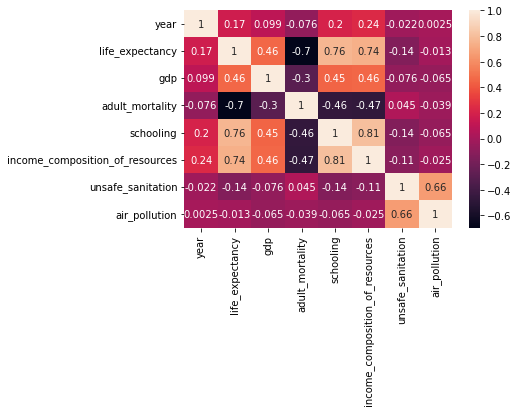

In [27]:
dataplot = sns.heatmap(tempDf.corr(),annot=True)
plt.show()

In [28]:
df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
year,1.000000,0.167869,-0.075925,-0.037966,-0.047407,0.033362,0.095865,-0.091690,0.073487,-0.043241,...,0.023277,0.006952,-0.037312,-0.064973,0.028564,0.002464,0.016878,0.012745,0.016918,0.024869
life_expectancy,0.167869,1.000000,-0.695114,-0.185664,0.420544,0.401866,0.248126,-0.149013,0.586011,-0.211877,...,0.052813,0.068076,-0.148002,-0.226592,0.031744,-0.012566,0.034716,0.054239,0.040491,0.040910
adult_mortality,-0.075925,-0.695114,1.000000,0.066929,-0.214492,-0.256543,-0.153725,0.014211,-0.389355,0.082330,...,-0.068812,-0.080255,0.052253,0.088414,-0.061782,-0.039138,-0.064188,-0.065070,-0.064235,-0.060495
infant_deaths,-0.037966,-0.185664,0.066929,1.000000,-0.114973,-0.087973,-0.228853,0.520699,-0.249171,0.996604,...,0.565376,0.491182,0.966696,0.956161,0.754926,0.740283,0.609359,0.261011,0.601419,0.692946
alcohol,-0.047407,0.420544,-0.214492,-0.114973,1.000000,0.362118,0.088025,-0.041118,0.353790,-0.111164,...,-0.004630,0.005563,-0.115137,-0.098703,-0.016717,-0.055091,-0.023609,-0.005037,-0.020943,-0.018003
percentage_expenditure,0.033362,0.401866,-0.256543,-0.087973,0.362118,1.000000,0.011148,-0.059082,0.229186,-0.090535,...,-0.029598,-0.014500,-0.069501,-0.080115,-0.013647,-0.052330,-0.035168,-0.026371,-0.038708,-0.038214
hepatitis_b,0.095865,0.248126,-0.153725,-0.228853,0.088025,0.011148,1.000000,-0.124624,0.179453,-0.238758,...,-0.063952,-0.053027,-0.220218,-0.247861,-0.102049,-0.106690,-0.068474,-0.010563,-0.072373,-0.088498
measles,-0.091690,-0.149013,0.014211,0.520699,-0.041118,-0.059082,-0.124624,1.000000,-0.193355,0.528079,...,0.546366,0.545541,0.391771,0.497153,0.526733,0.592405,0.564346,0.478018,0.553437,0.528473
bmi,0.073487,0.586011,-0.389355,-0.249171,0.353790,0.229186,0.179453,-0.193355,1.000000,-0.260636,...,-0.102028,-0.096187,-0.213158,-0.248724,-0.126647,-0.157334,-0.111923,-0.083077,-0.105712,-0.105520
under-five_deaths,-0.043241,-0.211877,0.082330,0.996604,-0.111164,-0.090535,-0.238758,0.528079,-0.260636,1.000000,...,0.531437,0.457613,0.958869,0.970894,0.722405,0.709742,0.576485,0.233345,0.566583,0.657285


In [29]:
top_countries_by_lifeExpectancy = df.sort_values(by = 'life_expectancy', ascending = False)['country'].unique()[:10]
list(top_countries_by_lifeExpectancy)

['Belgium',
 'Italy',
 'Norway',
 'Germany',
 'Spain',
 'Sweden',
 'Finland',
 'France',
 'Portugal',
 'New Zealand']

In [30]:
bottom_countries_by_lifeExpectancy = df.sort_values(by = 'life_expectancy')['country'].unique()[:10]
list(bottom_countries_by_lifeExpectancy)

['Haiti',
 'Sierra Leone',
 'Malawi',
 'Zambia',
 'Zimbabwe',
 'Lesotho',
 'Angola',
 'Eritrea',
 'Central African Republic',
 'Botswana']

In [31]:
'United States of America' in list(df['country'])

False

In [32]:
top_countries_by_BMI = df.sort_values(by = 'bmi', ascending = False)['country'].unique()[:10]
list(top_countries_by_BMI)

['New Zealand',
 'Fiji',
 'Finland',
 'Poland',
 'France',
 'Greece',
 'Estonia',
 'South Sudan',
 'Portugal',
 'Germany']

In [33]:
#!pip install dataprep
#from dataprep.eda import create_report
#report = create_report(df, title='My Report')
#report

# CLUSTERING

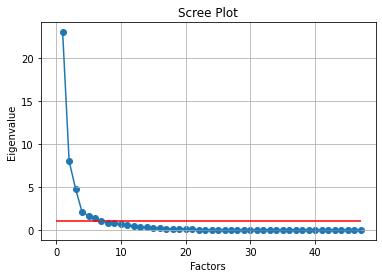

In [34]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

 
#Transform the data
df_oneyear = df[df['year']==2012]
df_oneyear = df_oneyear.drop(columns=['country', 'status', 'year'])

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') 
imp_mean.fit(df_oneyear)
X = imp_mean.transform(df_oneyear)


sc = StandardScaler()
X = sc.fit_transform(X)


from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(X)

ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.hlines(1, 0, X.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#Graph shows that no of factors sufficient to represent the data is 7

pca = PCA(7)
X_pca = pca.fit_transform(X)


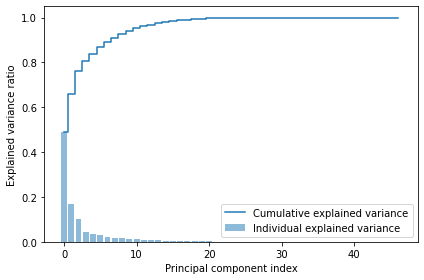

In [35]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#WE SEE THAT 8 COMPONENTS EXPLAIN ABOUT 90% OF THE VARIANCE

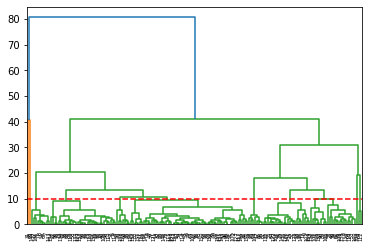

In [36]:
import scipy.cluster.hierarchy as sch

#Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

#Shows that we could use 8 clusters

[0 1 2 3 4 5 6 7]


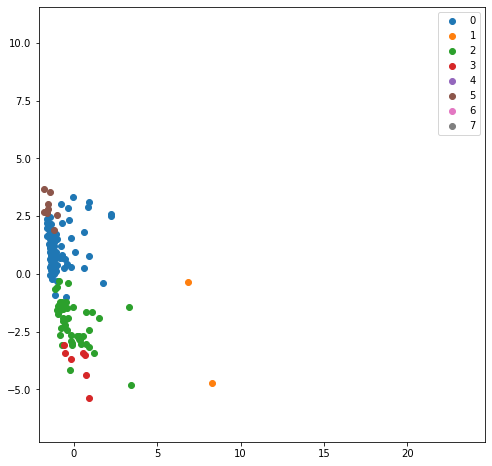

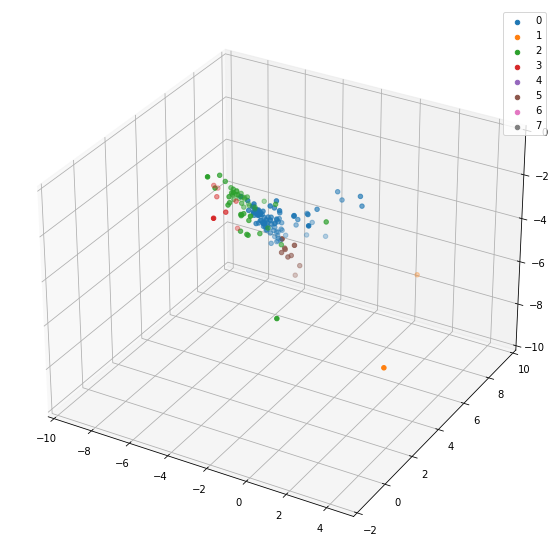

In [37]:
ag8 = AgglomerativeClustering(8)
ag8.fit(X_pca)


identified_clusters = ag8.fit_predict(X_pca)
label = ag8.fit_predict(X_pca)

u_labels = np.unique(identified_clusters)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
print(u_labels)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
xmin, xmax = plt.xlim()
scale_factor_x= 0.5
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
scale_factor_y = 0.5
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)
#xlim(xmin * scale_factor, xmax * scale_factor)
plt.show()



# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-10, 5)
ax.set_ylim3d(-2, 10)
ax.set_zlim3d(-10, 0)
for i in u_labels:
    ax.scatter(X_pca[label == i,0], X_pca[label == i,1], X_pca[label == i,2], label=i)
ax.legend()
plt.show()


C:\Users\godbo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


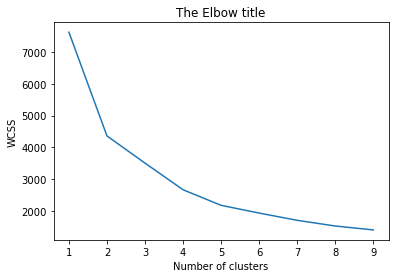

In [38]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

import matplotlib.pyplot as plt
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[0 1]


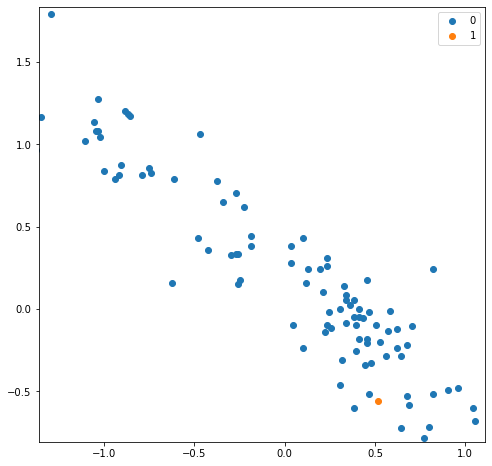

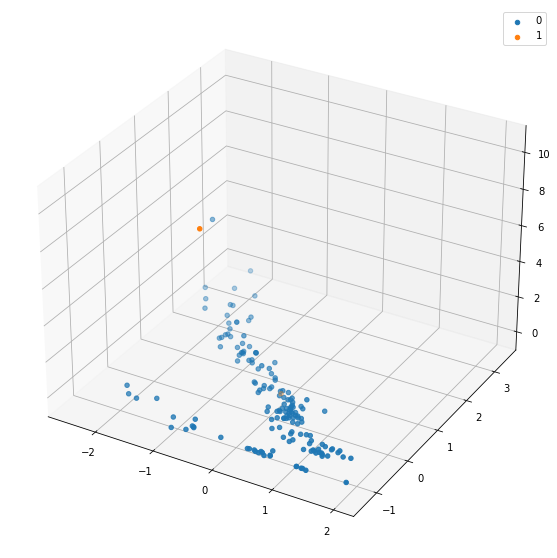

In [39]:
km2 = KMeans(2)
km2.fit(X)


identified_clusters = km2.fit_predict(X)
label = km2.fit_predict(X)

u_labels = np.unique(identified_clusters)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
print(u_labels)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
xmin, xmax = plt.xlim()
scale_factor_x= 0.5
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
scale_factor_y = 0.5
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)
#xlim(xmin * scale_factor, xmax * scale_factor)
plt.show()



# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(X[label == i,0], X[label == i,1],X[label == i,2], label=i)
ax.legend()
plt.show()


[0 1 2 3]


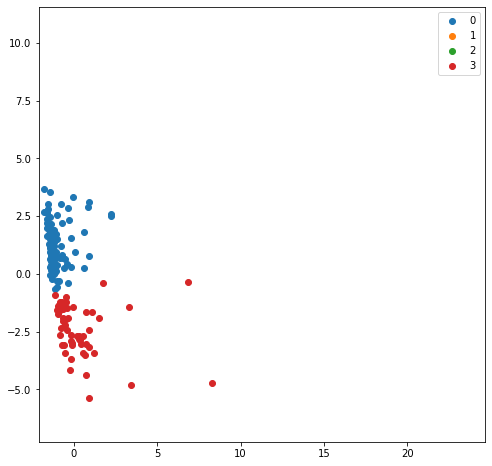

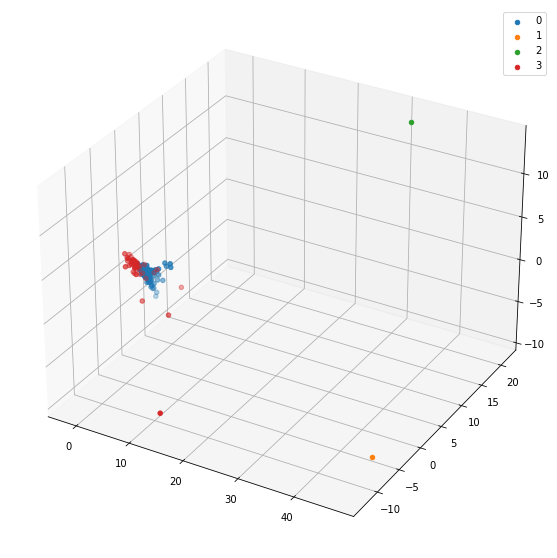

In [40]:
kmeans = KMeans(4)
kmeans.fit(X_pca)


identified_clusters = kmeans.fit_predict(X_pca)
label = kmeans.fit_predict(X_pca)


u_labels = np.unique(identified_clusters)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
print(u_labels)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
xmin, xmax = plt.xlim()
scale_factor_x= 0.5
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
scale_factor_y = 0.5
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)
#xlim(xmin * scale_factor, xmax * scale_factor)
plt.show()



# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(X_pca[label == i,0], X_pca[label == i,1], X_pca[label == i,2], label=i)
ax.legend()
plt.show()


[0 1 2 3 4 5 6 7]


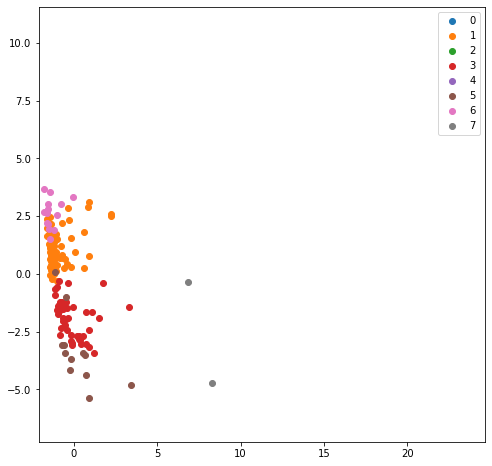

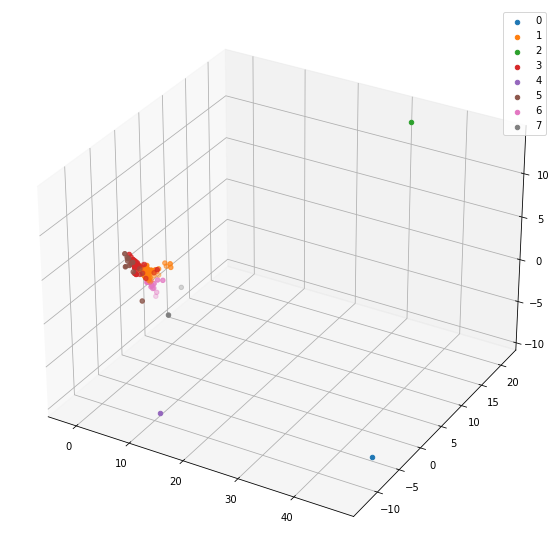

In [41]:
kmeans = KMeans(8)
kmeans.fit(X_pca)


identified_clusters = kmeans.fit_predict(X_pca)
label = kmeans.fit_predict(X_pca)



u_labels = np.unique(identified_clusters)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
print(u_labels)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
xmin, xmax = plt.xlim()
scale_factor_x= 0.5
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
scale_factor_y = 0.5
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)
#xlim(xmin * scale_factor, xmax * scale_factor)
plt.show()



# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(X_pca[label == i,0], X_pca[label == i,1], X_pca[label == i,2], label=i)
ax.legend()
plt.show()


[-1  0]


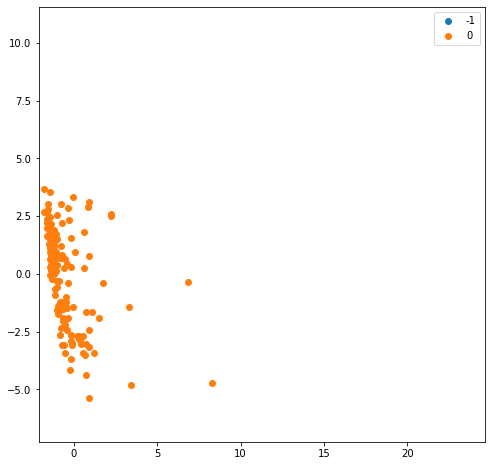

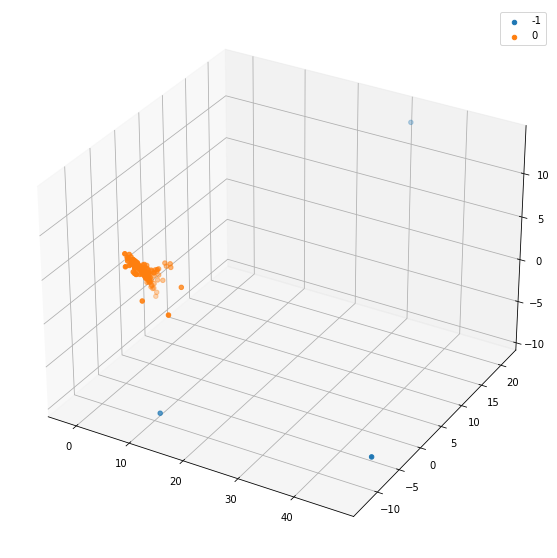

In [42]:
kmeans = DBSCAN(eps=10, min_samples=15)
kmeans.fit(X_pca)


identified_clusters = kmeans.fit_predict(X_pca)
label = kmeans.fit_predict(X_pca)


u_labels = np.unique(identified_clusters)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
print(u_labels)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
xmin, xmax = plt.xlim()
scale_factor_x= 0.5
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
scale_factor_y = 0.5
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)
#xlim(xmin * scale_factor, xmax * scale_factor)
plt.show()



# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(X_pca[label == i,0], X_pca[label == i,1], X_pca[label == i,2], label=i)
ax.legend()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score

num_clusters = np.arange(2,10)
results_kmeans={}
results_agg={}
for size in num_clusters:
    model_km = KMeans(n_clusters = size).fit(X_pca)
    predictions_km = model_km.predict(X_pca)
    results_kmeans[size] = silhouette_score(X_pca, predictions_km)
    
    model_agg = AgglomerativeClustering(n_clusters = size)
    predictions_agg = model_agg.fit_predict(X_pca)
    results_agg[size] = silhouette_score(X_pca, predictions_agg)
    
    

best_size_km = max(results_kmeans, key=results_kmeans.get)
best_agg = max(results_agg, key=results_agg.get)

In [44]:
print(results_kmeans)
print(results_agg)

{2: 0.8817876102593002, 3: 0.3930358330523575, 4: 0.39193763537220483, 5: 0.390884697888106, 6: 0.32604443370703484, 7: 0.3593400928142147, 8: 0.37048362659962236, 9: 0.2543959855428164}
{2: 0.8817876102593002, 3: 0.3883621790713285, 4: 0.3872619970338492, 5: 0.3911883979536072, 6: 0.3637316768853433, 7: 0.36802094359016735, 8: 0.37201223310855575, 9: 0.24031433070390534}


In [46]:
labels_km2 = km2.labels_
labels_ag8 = ag8.labels_

df_km2 = df[df['year']==2012]
df_ag8 = df[df['year']==2012]

df_km2 = pd.DataFrame(df_km2['country'])
df_ag8 = pd.DataFrame(df_ag8['country'])

df_km2.reset_index(drop=True, inplace=True)
df_ag8.reset_index(drop=True, inplace=True)

df_km2['labels'] = labels_km2
df_ag8['labels'] = labels_ag8

In [47]:
df_km2 = df_km2.sort_values(by = 'labels')
df_km2.reset_index(drop=True, inplace=True)

df_ag8 = df_ag8.sort_values(by = 'labels')
df_ag8.reset_index(drop=True, inplace=True)

In [48]:
df_km2

,country,labels
0,Afghanistan,0
1,Namibia,0
2,Nepal,0
3,Netherlands,0
4,New Zealand,0
...,...,...
157,Ghana,0
158,Fiji,0
159,Zimbabwe,0
160,India,1


In [49]:
df_ag8

,country,labels
0,Kuwait,0
1,Kiribati,0
2,Kazakhstan,0
3,Jordan,0
4,Japan,0
...,...,...
157,Australia,5
158,Netherlands,5
159,Finland,5
160,Nigeria,6


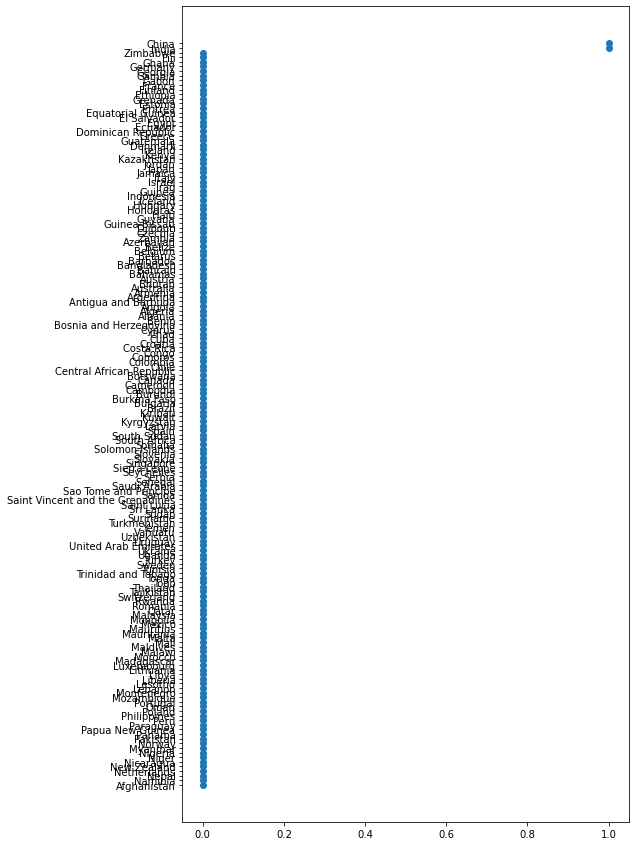

In [50]:
fig = plt.figure(figsize = (8,15))
plt.scatter(df_km2['labels'], df_km2['country'])

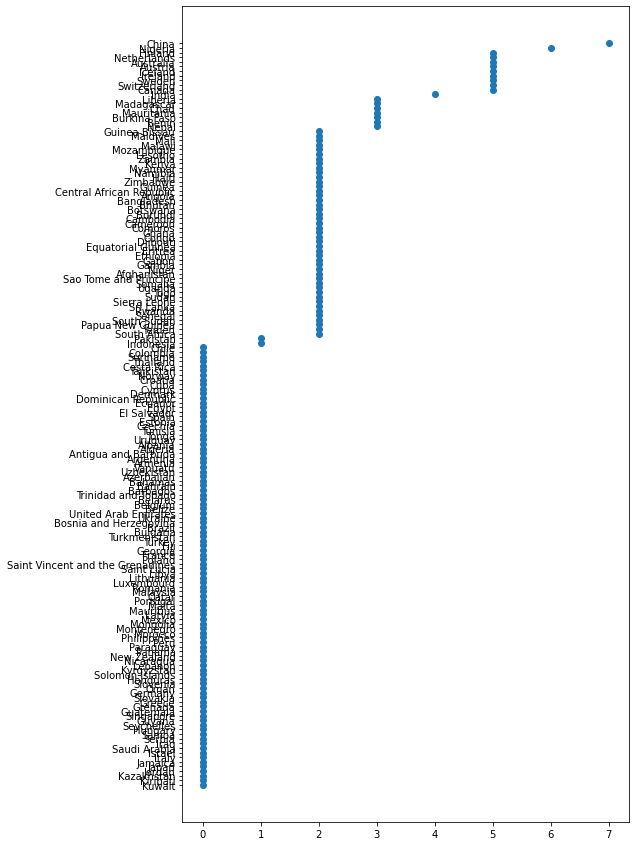

In [51]:
fig = plt.figure(figsize = (8,15))
plt.scatter(df_ag8['labels'], df_ag8['country'])

In [56]:
import plotly.express as px

fig = px.choropleth(locations=df_ag8['country'], locationmode="country names", color=df_ag8['labels'])
fig.show()

In [57]:
import plotly.express as px

fig = px.choropleth(locations=df_km2['country'], locationmode="country names", color=df_km2['labels'])
fig.show()